In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
CLASSES = {1: 'person', 2: 'bicycle', 3: 'car', 4: 'motorcycle', 5: 'airplane', 6: 'bus', 7: 'train', 8: 'truck',
           9: 'boat', 10: 'traffic light', 11: 'fire hydrant', 13: 'stop sign', 14: 'parking meter', 15: 'bench', 
           16: 'bird', 17: 'cat', 18: 'dog', 19: 'horse', 20: 'sheep', 21: 'cow', 22: 'elephant', 23: 'bear',
           24: 'zebra', 25: 'giraffe', 27: 'backpack', 28: 'umbrella', 31: 'handbag', 32: 'tie', 33: 'suitcase',
           34: 'frisbee', 35: 'skis', 36: 'snowboard', 37: 'sports ball', 38: 'kite', 39: 'baseball bat', 
           40: 'baseball glove', 41: 'skateboard', 42: 'surfboard', 43: 'tennis racket', 44: 'bottle', 
           46: 'wine glass', 47: 'cup', 48: 'fork', 49: 'knife', 50: 'spoon', 51: 'bowl', 52: 'banana', 
           53: 'apple', 54: 'sandwich', 55: 'orange', 56: 'broccoli', 57: 'carrot', 58: 'hot dog', 59: 'pizza', 
           60: 'donut', 61: 'cake', 62: 'chair', 63: 'couch', 64: 'potted plant', 65: 'bed', 67: 'dining table', 
           70: 'toilet', 72: 'tv', 73: 'laptop', 74: 'mouse', 75: 'remote', 76: 'keyboard', 77: 'cell phone',
           78: 'microwave', 79: 'oven', 80: 'toaster', 81: 'sink', 82: 'refrigerator', 84: 'book', 85: 'clock',
           86: 'vase', 87: 'scissors', 88: 'teddy bear', 89: 'hair drier', 90: 'toothbrush'}

In [3]:
model_path = './ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb'
model = tf.Graph()
with model.as_default():
    od_graph_def = tf.compat.v1.GraphDef()
    with tf.compat.v2.io.gfile.GFile(model_path, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')

In [4]:
image1_path = 'dog_bike_car.jpg'
image1 = cv2.imread(image1_path)
image2_path = 'street.jpg'
image2 = cv2.imread(image2_path)
image3_path = 'zoo.jpg'
image3 = cv2.imread(image3_path)

image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

In [5]:
input_tensor = model.get_tensor_by_name('image_tensor:0')
output_tensors = {
    'boxes': model.get_tensor_by_name('detection_boxes:0'),
    'scores': model.get_tensor_by_name('detection_scores:0'),
    'classes': model.get_tensor_by_name('detection_classes:0'),
    'num_detections': model.get_tensor_by_name('num_detections:0')
}

In [6]:
with tf.compat.v1.Session(graph=model) as sess:
    image1_tensor = np.expand_dims(image1, axis=0)
    image2_tensor = np.expand_dims(image2, axis=0)
    image3_tensor = np.expand_dims(image3, axis=0)
    output_values1 = sess.run(output_tensors, feed_dict={input_tensor: image1_tensor})
    output_values2 = sess.run(output_tensors, feed_dict={input_tensor: image2_tensor})
    output_values3 = sess.run(output_tensors, feed_dict={input_tensor: image3_tensor})

In [7]:
boxes1 = output_values1['boxes'][0]
scores1 = output_values1['scores'][0]
classes1 = output_values1['classes'][0].astype(np.int32)
num_detections1 = int(output_values1['num_detections'][0])

boxes2 = output_values2['boxes'][0]
scores2 = output_values2['scores'][0]
classes2 = output_values2['classes'][0].astype(np.int32)
num_detections2 = int(output_values2['num_detections'][0])

boxes3 = output_values3['boxes'][0]
scores3 = output_values3['scores'][0]
classes3 = output_values3['classes'][0].astype(np.int32)
num_detections3 = int(output_values3['num_detections'][0])

In [8]:
for i in range(num_detections1):
    if scores1[i] > 0.5:
        ymin, xmin, ymax, xmax = boxes1[i]
        x, y, w, h = int(xmin * image1.shape[1]), int(ymin * image1.shape[0]), \
            int((xmax - xmin) * image1.shape[1]), int((ymax - ymin) * image1.shape[0])
        class_id = classes1[i]
        class_name = f'Class id {class_id}, name {CLASSES[class_id]}'
        cv2.rectangle(image1, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.rectangle(image1, (x, y), (x + w, y - 25), (0, 255, 0), cv2.FILLED)
        cv2.putText(image1, class_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

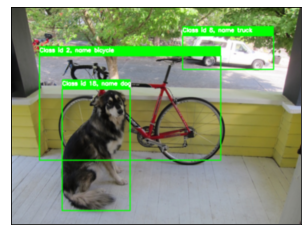

In [9]:
plt.imshow(image1, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

In [10]:
for i in range(num_detections2):
    if scores2[i] > 0.5:
        ymin, xmin, ymax, xmax = boxes2[i]
        x, y, w, h = int(xmin * image2.shape[1]), int(ymin * image2.shape[0]), \
            int((xmax - xmin) * image2.shape[1]), int((ymax - ymin) * image2.shape[0])
        class_id = classes2[i]
        class_name = f'Class id {class_id}, name {CLASSES[class_id]}'
        cv2.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.rectangle(image2, (x, y), (x + w, y - 25), (0, 255, 0), cv2.FILLED)
        cv2.putText(image2, class_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

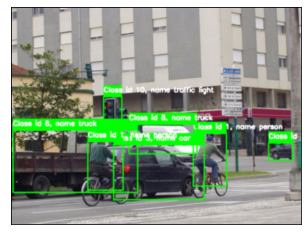

In [11]:
plt.imshow(image2, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

In [12]:
for i in range(num_detections3):
    if scores3[i] > 0.5:
        ymin, xmin, ymax, xmax = boxes3[i]
        x, y, w, h = int(xmin * image3.shape[1]), int(ymin * image3.shape[0]), \
            int((xmax - xmin) * image3.shape[1]), int((ymax - ymin) * image3.shape[0])
        class_id = classes3[i]
        class_name = f'Class id {class_id}, name {CLASSES[class_id]}'
        cv2.rectangle(image3, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.rectangle(image3, (x, y), (x + w, y - 25), (0, 255, 0), cv2.FILLED)
        cv2.putText(image3, class_name, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

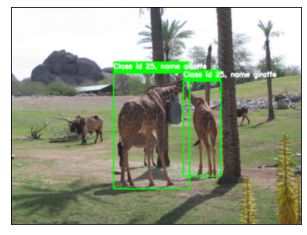

In [13]:
plt.imshow(image3, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])
plt.show()